In [1]:
import pandas as pd
from statsbombpy import sb
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

C:\Users\33735\AppData\Local\Temp\ipykernel_47044\963955702.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
...,...,...,...,...,...,...,...,...,...,...,...,...
66,55,43,Europe,UEFA Euro,male,False,True,2020,2023-02-24T21:26:47.128979,2023-04-27T22:38:34.970148,2023-04-27T22:38:34.970148,2023-02-24T21:26:47.128979
67,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2023-06-18T19:28:39.443883,2021-06-13T16:17:31.694,None,2023-06-18T19:28:39.443883
68,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2023-10-24T03:36:54.066267,2023-10-24T03:37:29.085948,2023-10-24T03:37:29.085948,2023-10-24T03:36:54.066267
69,72,107,International,Women's World Cup,female,False,True,2023,2023-12-12T14:06:50.626363,2023-12-12T14:12:41.561162,2023-12-12T14:12:41.561162,2023-12-12T14:06:50.626363


In [3]:
sb.matches(competition_id=43, season_id=106).match_id

0     3857256
1     3869151
2     3857257
3     3857258
4     3857288
       ...   
59    3857265
60    3857262
61    3857261
62    3857255
63    3857254
Name: match_id, Length: 64, dtype: int64

In [4]:
matches = sb.matches(competition_id=43, season_id=106)

In [5]:
match_ids = matches['match_id'].tolist()

In [6]:
def fetch_and_filter_goals(match_id):
    # Fetch match events
    events = sb.events(match_id=match_id)
    
    # Filter for 'Shot' events that resulted in a 'Goal'
    goals = events[(events['type'] == 'Shot') & (events['shot_outcome'] == 'Goal')]
    
    # Select relevant columns for analysis
    goals = goals[['id', 'minute', 'second', 'shot_statsbomb_xg', 'player', 'team', 'location', 'shot_end_location', 'shot_body_part', 'shot_technique', 'type']]
    
    return goals


In [7]:
all_goals = pd.DataFrame()

for match_id in match_ids:
    try:
        match_goals = fetch_and_filter_goals(match_id)
        all_goals = pd.concat([all_goals, match_goals], ignore_index=True)
    except Exception as e:
        print(f"Failed to process match {match_id}: {e}")


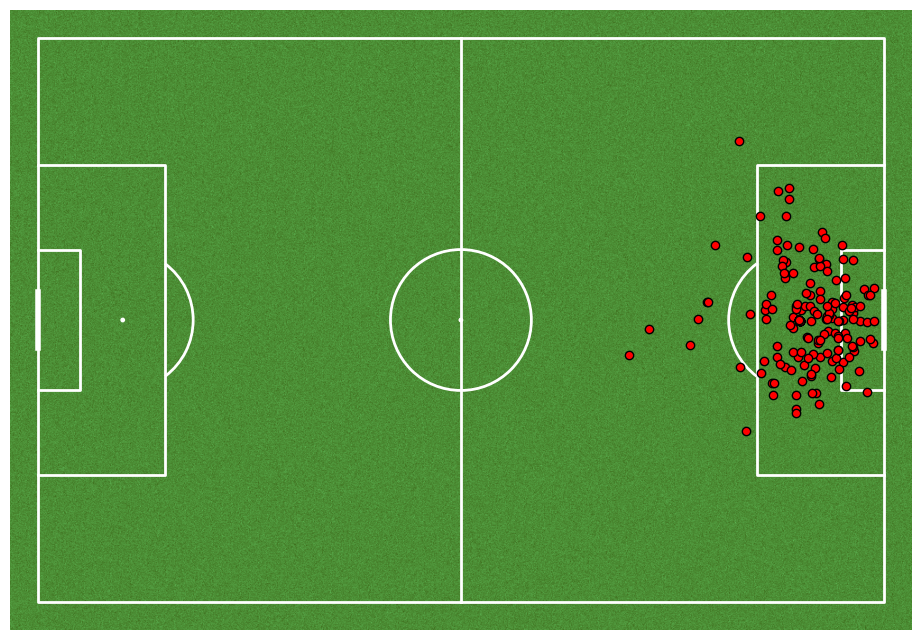

In [8]:
from mplsoccer.pitch import Pitch

# Assuming 'location' is a list of [x, y] coordinates
x_coords = [loc[0] for loc in all_goals['location'].tolist() if loc is not None]
y_coords = [loc[1] for loc in all_goals['location'].tolist() if loc is not None]

pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 6.5))
scatter = ax.scatter(x_coords, y_coords, c='red', edgecolors='k', zorder=2)

plt.show()


C:\Users\33735\AppData\Local\Temp\ipykernel_47044\2247957500.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


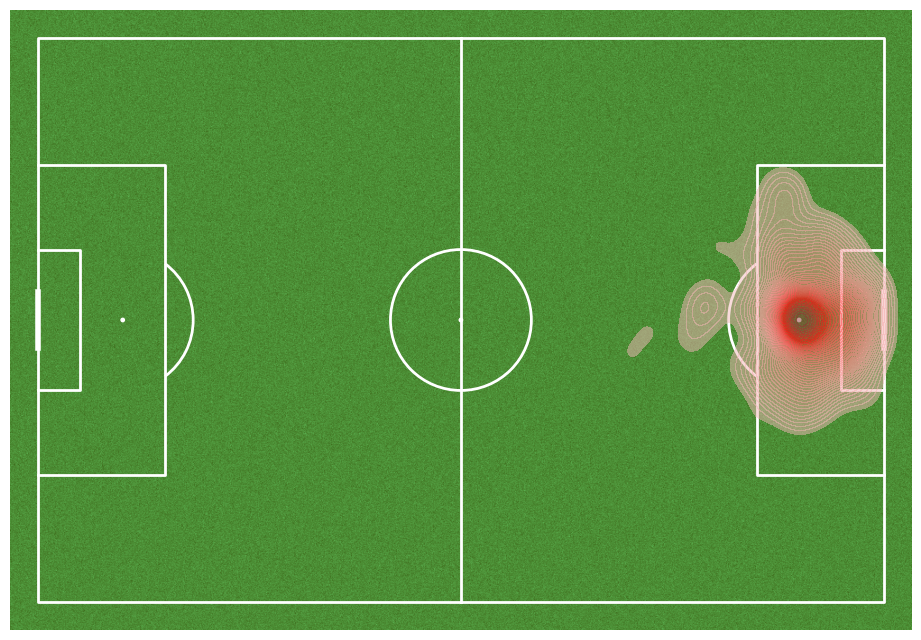

In [9]:
import seaborn as sns

# Assuming 'location' is a list of [x, y] coordinates for goals
goal_locations = [loc for loc in all_goals['location'].tolist() if loc is not None]

# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 6.5))

# Generate KDE plot for goal locations
sns.kdeplot(
    x=[loc[0] for loc in goal_locations], 
    y=[loc[1] for loc in goal_locations], 
    shade=True, 
    levels=50, 
    color="red", 
    alpha=0.5, 
    zorder=2, 
    ax=ax
)
plt.show()




C:\Users\33735\AppData\Local\Temp\ipykernel_47044\2864742807.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


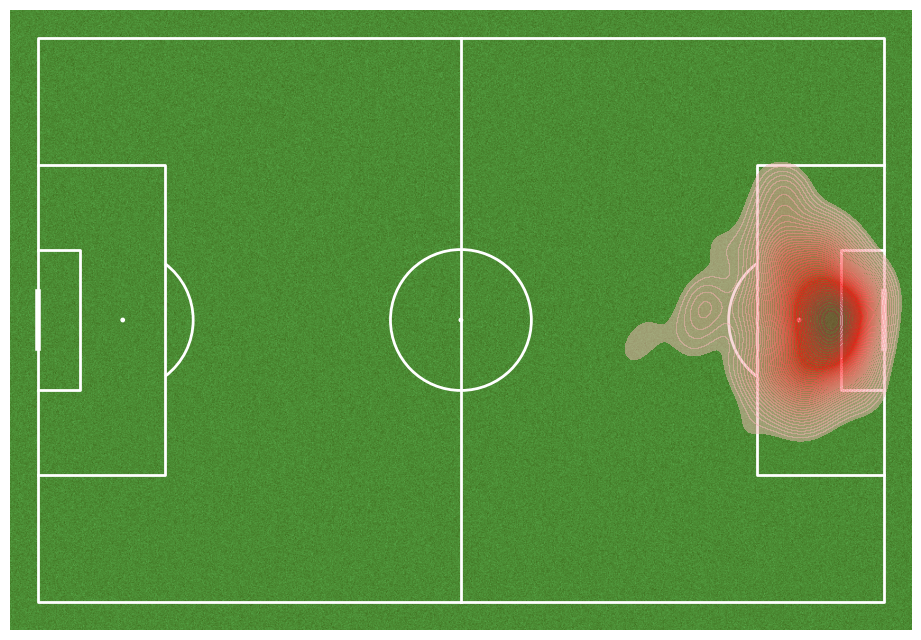

In [10]:
# Assume shots with an xG of 0.75 or higher might be penalties
non_penalty_goals = all_goals[all_goals['shot_statsbomb_xg'] < 0.75]

# Extract locations for non-penalty goals
non_penalty_goal_locations = [loc for loc in non_penalty_goals['location'].tolist() if loc is not None]

# Create a pitch and heatmap for non-penalty goals
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 6.5))
sns.kdeplot(
    x=[loc[0] for loc in non_penalty_goal_locations], 
    y=[loc[1] for loc in non_penalty_goal_locations], 
    shade=True, 
    levels=50, 
    color="red", 
    alpha=0.5, 
    zorder=2, 
    ax=ax
)
plt.show()






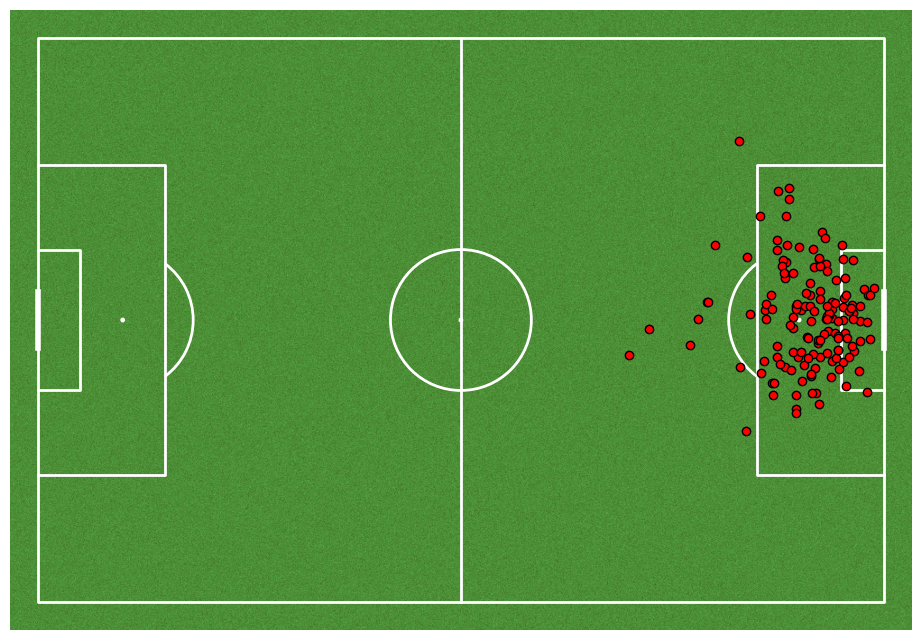

In [11]:
from mplsoccer.pitch import Pitch

# Filter out likely penalties using the xG value
non_penalty_goals = all_goals[all_goals['shot_statsbomb_xg'] < 0.75]

# Assuming 'location' is a list of [x, y] coordinates for non-penalty goals
x_coords_non_penalty = [loc[0] for loc in non_penalty_goals['location'].tolist() if loc is not None]
y_coords_non_penalty = [loc[1] for loc in non_penalty_goals['location'].tolist() if loc is not None]

# Draw the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='white')
fig, ax = pitch.draw(figsize=(10, 6.5))

# Create scatter plot for non-penalty goals
scatter = ax.scatter(x_coords_non_penalty, y_coords_non_penalty, c='red', edgecolors='k', zorder=2)

plt.show()


In [12]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\users\33735\appdata\local\programs\python\python312\lib\site-packages (5.20.0)




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import plotly.express as px
import plotly.graph_objects as go

# Filter out likely penalties using the xG value
non_penalty_goals = all_goals[all_goals['shot_statsbomb_xg'] < 0.75]

# Create a DataFrame with non-penalty shot locations and additional details for hover data
locations_df = non_penalty_goals[['location', 'player', 'minute', 'shot_statsbomb_xg']].dropna()
locations_df[['X', 'Y']] = pd.DataFrame(locations_df['location'].tolist(), index=locations_df.index)

# Drop the original 'location' column as it's no longer needed
locations_df.drop('location', axis=1, inplace=True)

# Create an interactive scatter plot with additional details for hover data
fig = px.scatter(locations_df, x='X', y='Y',
                 hover_data=['player', 'minute', 'shot_statsbomb_xg'])

# Update marker appearance
fig.update_traces(marker=dict(size=12,
                              color='red',
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# Define pitch markings
pitch_shapes = [
    # Pitch Outline & Centre Line
    go.layout.Shape(type="rect", x0=0, y0=0, x1=120, y1=80, line=dict(color="white")),
    go.layout.Shape(type="line", x0=60, y0=0, x1=60, y1=80, line=dict(color="white")),
    
    # Left Penalty Area
    go.layout.Shape(type="rect", x0=0, y0=18, x1=18, y1=62, line=dict(color="white")),
    
    # Right Penalty Area
    go.layout.Shape(type="rect", x0=102, y0=18, x1=120, y1=62, line=dict(color="white")),
    
    # Left 6-yard Box
    go.layout.Shape(type="rect", x0=0, y0=30, x1=6, y1=50, line=dict(color="white")),
    
    # Right 6-yard Box
    go.layout.Shape(type="rect", x0=114, y0=30, x1=120, y1=50, line=dict(color="white")),
    
    # Centre Circle
    go.layout.Shape(type="circle", x0=54, y0=34, x1=66, y1=46, line=dict(color="white")),
    
    # Centre Spot
    go.layout.Shape(type="circle", xref="x", yref="y", x0=59.5, y0=39.5, x1=60.5, y1=40.5, line=dict(color="white")),
]

# Update layout with pitch-like styling and add pitch shapes
fig.update_layout(
    title='Non-Penalty Goal Locations',
    shapes=pitch_shapes,
    paper_bgcolor='rgba(0, 128, 0, 0.8)',  # Set the background color for the figure
    plot_bgcolor='rgba(0, 128, 0, 0.8)',  # Set the background color for the plot
    xaxis=dict(
        showgrid=False,  # Hide the grid lines for the x-axis
        zeroline=False,  # Hide the zero line for the x-axis
        showticklabels=False,  # Hide the tick labels for the x-axis
        range=[-10, 130]  # Adjust to include the full pitch width
    ),
    yaxis=dict(
        showgrid=False,  # Hide the grid lines for the y-axis
        zeroline=False,  # Hide the zero line for the y-axis
        showticklabels=False,  # Hide the tick labels for the y-axis
        range=[-10, 90]  # Adjust to include the full pitch length
    ),
)

# Show the figure
fig.show()


In [24]:
import altair as alt
import pandas as pd

# Disable max row limit (use with caution)
alt.data_transformers.disable_max_rows()
# Assuming 'non_penalty_goals' is a DataFrame containing the relevant information
# First, ensure that your data is prepared as required for the visualization:
non_penalty_goals = all_goals[all_goals['shot_statsbomb_xg'] < 0.75]
non_penalty_goals['minute'] = non_penalty_goals['minute'].astype(int)  # Make sure minutes are integers

# Create an interval selection
brush = alt.selection_interval(encodings=['x'])

# Create the histogram with the interval selection
histogram = alt.Chart(non_penalty_goals).mark_bar().encode(
    x=alt.X('minute:Q', bin=alt.Bin(maxbins=90), title='Match Minute'),
    y=alt.Y('count()', title='Number of Goals'),
    tooltip=['minute', 'count()']
).properties(
    title='Distribution of Non-Penalty Goals Across Match Minutes',
    width=600
).add_selection(
    brush
)

# Define a chart that displays average xG based on the selection
average_xg_text = alt.Chart(non_penalty_goals).mark_text(align='left').encode(
    x=alt.value(5),  # A fixed x position for the text
    y=alt.value(20),  # A fixed y position for the text
    text=alt.Text('mean(shot_statsbomb_xg):Q', format='.2f')
).transform_filter(
    brush
).properties(
    title='Average xG for Selected Minutes'  # Updated title
)

# Combine the histogram and average xG text
combined_chart = histogram & average_xg_text


# Save the combined chart to an HTML file
combined_chart.save('interactive_non_penalty_goals_chart.html')




C:\Users\33735\AppData\Local\Temp\ipykernel_47044\1700417439.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
import pandas as pd
from statsbombpy import sb
import plotly.express as px
import plotly.graph_objects as go

# Fetch competitions and matches as before
matches = sb.matches(competition_id=43, season_id=106)
match_ids = matches['match_id'].tolist()

# Function to fetch and filter shots
def fetch_and_filter_shots(match_id, outcome_filter=None, type_filter=None, player_filter=None, team_filter=None):
    # Fetch match events
    events = sb.events(match_id=match_id)
    
    # Filter for 'Shot' events
    shots = events[events['type'] == 'Shot']
    
    # Apply additional filters if provided
    if outcome_filter:
        shots = shots[shots['shot_outcome'].isin(outcome_filter)]
    if type_filter:
        shots = shots[shots['shot_body_part'].isin(type_filter)]
    if player_filter:
        shots = shots[shots['player'].isin(player_filter)]
    if team_filter:
        shots = shots[shots['team'].isin(team_filter)]
    
    # Select relevant columns for analysis
    shots = shots[['minute', 'second', 'shot_statsbomb_xg', 'player', 'team', 'location']]
    
    return shots

# Gather all shots with the specified filters
all_shots = pd.DataFrame()

for match_id in match_ids:
    try:
        # Example filters
        match_shots = fetch_and_filter_shots(match_id, outcome_filter=['Goal', 'Off Target', 'Saved'], type_filter=['Left Foot', 'Right Foot', 'Head'], player_filter=None, team_filter=None)
        all_shots = pd.concat([all_shots, match_shots], ignore_index=True)
    except Exception as e:
        print(f"Failed to process match {match_id}: {e}")

# Function to create an interactive shot map using Plotly
def create_interactive_shot_map(shots_data, output_filename='interactive_shot_map.html'):
    # Convert location list of lists into two separate lists for x and y coordinates
    shots_data['x'] = [loc[0] if loc is not None else None for loc in shots_data['location']]
    shots_data['y'] = [loc[1] if loc is not None else None for loc in shots_data['location']]

    # Create scatter plot
    fig = px.scatter(shots_data, x='x', y='y', color='shot_statsbomb_xg',
                     hover_data=['minute', 'second', 'player', 'team'])

    # Add a soccer pitch layout
    fig.update_layout(
        xaxis=dict(showgrid=False, zeroline=False, range=[0, 120]),
        yaxis=dict(showgrid=False, zeroline=False, range=[0, 80]),
        shapes=[
            # Left penalty area
            dict(type="rect", x0=0, y0=18, x1=18, y1=62, line=dict(color="white")),
            # Right penalty area
            dict(type="rect", x0=102, y0=18, x1=120, y1=62, line=dict(color="white")),
            # Left 6-yard box
            dict(type="rect", x0=0, y0=30, x1=6, y1=50, line=dict(color="white")),
            # Right 6-yard box
            dict(type="rect", x0=114, y0=30, x1=120, y1=50, line=dict(color="white")),
            # Center circle
            dict(type="circle", xref="x", yref="y", x0=60-10, y0=40-10, x1=60+10, y1=40+10, line=dict(color="white"))
        ],
        height=600,
        width=800,
        title="Shot Map",
        paper_bgcolor='green',
        plot_bgcolor='green'
    )

    fig.write_html(output_filename, include_plotlyjs='cdn')

# Now create the interactive shot map with the gathered data
create_interactive_shot_map(all_shots)

